In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import cv2
import PIL

In [21]:
import os
import pandas as pd

# Set the path to the dataset
dataset_path = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing'

# List all the subdirectories (class folders) in the dataset
class_folders = os.listdir(dataset_path)

# Print class folder names to understand their structure
print(class_folders)

# Initialize an empty DataFrame to store the data
df = pd.DataFrame(columns=['image_path', 'label'])

# Loop through each class folder
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)

    # List all the images in the class folder, limited to the first 1000
    images = os.listdir(class_path)[:1000]

    # Add each full image path and its corresponding label to the DataFrame
    data = [{'image_path': os.path.join(class_path, image), 'label': class_folder} for image in images]
    df = pd.concat([df, pd.DataFrame(data)])

# Display the first few rows of the DataFrame
print(df.head())


['Late_Blight', 'Early_Blight', 'Healthy']
                                          image_path        label
0  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
1  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
2  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
3  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
4  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight


In [22]:
#couting each label
count_labels = df['label'].value_counts()

#Displayed The Number of labels
print("Counting Labels:")
print(count_labels)

Counting Labels:
label
Early_Blight    162
Late_Blight     141
Healthy         102
Name: count, dtype: int64


In [23]:
train_df = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training'
test_df = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing'
val_df = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation'

In [24]:
import os
import pandas as pd

def create_image_dataframe(root_dir):
    data = {'image_path': [], 'label': []}
    
    # Traverse root directory, and list directories as dirs and files as files
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust as per your file types
                filepath = os.path.join(subdir, file)
                label = subdir.split('/')[-1]  # Assumes last directory name is label
                data['image_path'].append(filepath)
                data['label'].append(label)
    
    return pd.DataFrame(data)

# Paths to your dataset folders
train_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training'
test_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing'
val_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation'

# Create DataFrames
train_df = create_image_dataframe(train_dir)
test_df = create_image_dataframe(test_dir)
val_df = create_image_dataframe(val_dir)

# Print out the first few rows of the train_df to confirm
print(train_df.head())


                                          image_path        label
0  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
1  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
2  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
3  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
4  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight


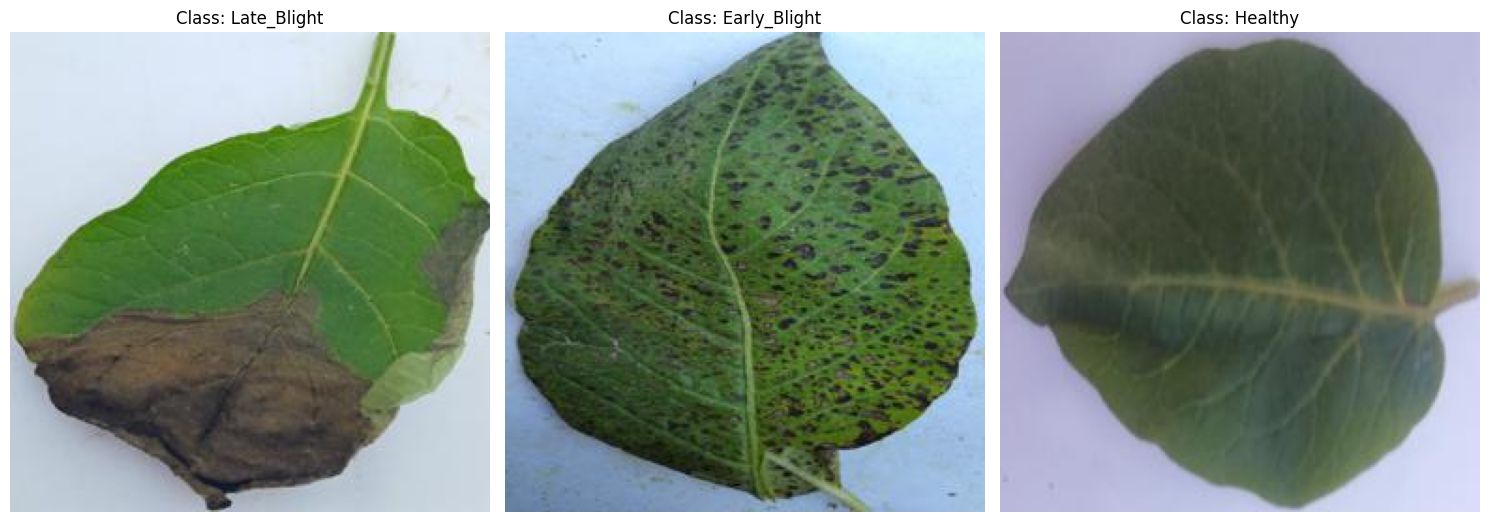

In [25]:
# Function to display images using subplots
def display_images_subplot(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15), tight_layout=True)  # Add tight_layout=True
    axes = axes.flatten()

    for i in range(len(images)):
        full_path = os.path.join(dataset_path, images[i])
        image = cv2.imread(full_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV reads images in BGR format, convert to RGB
        axes[i].imshow(image)
        axes[i].set_title(f'Class: {labels[i]}')
        axes[i].axis('off')

    # Remove empty subplots
    for j in range(len(images), len(axes)):
        fig.delaxes(axes[j])

    plt.show()

# Select one image per class for display
unique_labels = df['label'].unique()
selected_images = []
selected_labels = []

for class_label in unique_labels:
    class_image = df[df['label'] == class_label].iloc[0]  # Select the first image for each class
    selected_images.append(class_image['image_path'])
    selected_labels.append(class_label)

# Calculate the number of rows and columns based on the number of unique labels
rows = 2  
cols = 3 

# Display images using subplots
display_images_subplot(selected_images, selected_labels, rows, cols)

# **Image Size in  Dataset**

In [26]:
from PIL import Image

image_path = df['image_path'].iloc[1]
image = Image.open(image_path)

# Get image size
image_size = image.size
print("Image Size:", image_size)

Image Size: (256, 256)


# **Load Pre-trained Vision Transformer Image processor and Model**

In [27]:
from transformers import AutoImageProcessor, ViTForImageClassification
import torch

#Loading pre-train vit
feature_extractor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


# **Initialize image path and label**

In [28]:
import os
import pandas as pd

def create_image_dataframe(root_dir):
    data = {'image_path': [], 'label': []}
    
    # Traverse root directory, and list directories as dirs and files as files
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust as per your file types
                filepath = os.path.join(subdir, file)
                label = subdir.split('/')[-1]  # Assumes last directory name is label
                data['image_path'].append(filepath)
                data['label'].append(label)
    
    return pd.DataFrame(data)

# Paths to your dataset folders
train_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training'
test_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing'
val_dir = '/kaggle/input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation'

# Create DataFrames
train_df = create_image_dataframe(train_dir)
test_df = create_image_dataframe(test_dir)
val_df = create_image_dataframe(val_dir)

# Print out the first few rows of the train_df to confirm
print(train_df.head())


                                          image_path        label
0  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
1  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
2  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
3  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight
4  /kaggle/input/potato-disease-leaf-datasetpld/P...  Late_Blight


#  **Encode Label and Prepared Data Loader**

In [63]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from PIL import Image

# Define transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a fixed size
    transforms.ToTensor(),          # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Assuming the DataFrames train_df, val_df, and test_df are already defined
# Create a label encoder and fit it on your labels
label_encoder = LabelEncoder()
label_encoder.fit(train_df['label'])

# Convert labels to numerical representation
train_df['encoded_label'] = label_encoder.transform(train_df['label'])
val_df['encoded_label'] = label_encoder.transform(val_df['label'])
test_df['encoded_label'] = label_encoder.transform(test_df['label'])

class PotatoLeafDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths.iloc[idx]
        label = self.labels.iloc[idx]

        # Load and preprocess image
        image = Image.open(img_path).convert('RGB')
        if self.transform is not None:
            image = self.transform(image)

        return image, label

# Training dataset and loader
train_dataset_encoded = PotatoLeafDataset(train_df['image_path'], train_df['encoded_label'], transform=transform)
train_loader = DataLoader(train_dataset_encoded, batch_size=10, shuffle=True)

# Validation dataset and loader
val_dataset_encoded = PotatoLeafDataset(val_df['image_path'], val_df['encoded_label'], transform=transform)
val_loader = DataLoader(val_dataset_encoded, batch_size=10, shuffle=True)

# Test dataset and loader
test_dataset_encoded = PotatoLeafDataset(test_df['image_path'], test_df['encoded_label'], transform=transform)
test_loader = DataLoader(test_dataset_encoded, batch_size=10, shuffle=False)


for images, labels in train_loader:
    print(images.shape, labels.shape)
    break


torch.Size([10, 3, 224, 224]) torch.Size([10])


# **Print First Ten Training Example of the Dataset with Labels**

In [33]:
# Print sizes of the first 10 images from the train dataset with labels
print("Train dataset - Image sizes:")
for i in range(10):
    img_path = train_df['image_path'].iloc[i]
    label = train_df['label'].iloc[i]
 
    # Load and preprocess image
    image = Image.open(img_path).convert('RGB')
    if transform is not None:
        image = transform(image)  # Apply the composed transformation

    print(f"Sample {i + 1} - Label: {label}, Image Size: {image.size()}")


Train dataset - Image sizes:
Sample 1 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 2 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 3 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 4 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 5 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 6 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 7 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 8 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 9 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 10 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])


# **Print First Ten Testing Example of the Dataset with Labels**

In [34]:
# Print sizes of the first 10 images from the train dataset with labels
print("Train dataset - Image sizes:")
for i in range(10):
    img_path = test_df['image_path'].iloc[i]
    label = test_df['label'].iloc[i]
 
    # Load and preprocess image
    image = Image.open(img_path).convert('RGB')
    if transform is not None:
        image = transform(image)  # Apply the composed transformation

    print(f"Sample {i + 1} - Label: {label}, Image Size: {image.size()}")


Train dataset - Image sizes:
Sample 1 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 2 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 3 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 4 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 5 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 6 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 7 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 8 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 9 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 10 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])


# **Print First Ten Validation Example of the Dataset with Labels**

In [35]:
# Print sizes of the first 10 images from the train dataset with labels
print("Train dataset - Image sizes:")
for i in range(10):
    img_path = val_df['image_path'].iloc[i]
    label = val_df['label'].iloc[i]
 
    # Load and preprocess image
    image = Image.open(img_path).convert('RGB')
    if transform is not None:
        image = transform(image)  # Apply the composed transformation

    print(f"Sample {i + 1} - Label: {label}, Image Size: {image.size()}")


Train dataset - Image sizes:
Sample 1 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 2 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 3 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 4 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 5 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 6 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 7 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 8 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 9 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])
Sample 10 - Label: Late_Blight, Image Size: torch.Size([3, 256, 256])


In [46]:
import numpy as np
import torch

In [47]:
def collate_fn(batch):
    images, labels = zip(*batch)

    return {
        'pixel_values': torch.stack(images),
        'labels': torch.tensor(labels)
    }

# **Evaluation Metrices**

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(p):
    predictions = np.argmax(p.predictions, axis=1)
    references = p.label_ids

    accuracy = accuracy_score(references, predictions)
    precision = precision_score(references, predictions, average='weighted')
    recall = recall_score(references, predictions, average='weighted')
    f1 = f1_score(references, predictions, average='weighted')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }


# **Import Vision Transformer**

In [52]:
from transformers import ViTForImageClassification

# Initialize the ViT model for image classification with adapted classifier for your number of classes
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=len(label_encoder.classes_),  
    id2label={str(i): c for i, c in enumerate(label_encoder.classes_)},
    label2id={c: str(i) for i, c in enumerate(label_encoder.classes_)},
    ignore_mismatched_sizes=True  # Ignore the classifier weight size mismatches
)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

# **Start Training**

In [64]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-potatoDisease-demo-v5",
  per_device_train_batch_size=10,
  evaluation_strategy="steps",
  num_train_epochs=5,
  fp16=True,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [65]:
# Create a Trainer instance
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=train_loader.dataset,
    eval_dataset=val_loader.dataset,
    tokenizer=feature_extractor,
)


/tmp/ipykernel_23/4266588720.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [66]:
train_results = trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
100,0.064400,0.149985,0.956731,0.960420,0.956731,0.956951
200,0.312000,0.260876,0.935096,0.944710,0.935096,0.936358
300,0.342000,0.401701,0.901442,0.918180,0.901442,0.901393
400,0.052200,0.126323,0.973558,0.974234,0.973558,0.973323
500,0.046900,0.053864,0.985577,0.985870,0.985577,0.985557
600,0.001200,0.035873,0.990385,0.990491,0.990385,0.990384
700,0.167800,0.031554,0.992788,0.992823,0.992788,0.992781
800,0.002000,0.041900,0.990385,0.990615,0.990385,0.990403
900,0.007600,0.149378,0.983173,0.983627,0.983173,0.983104
1000,0.000100,0.096000,0.987981,0.988210,0.987981,0.988012


In [67]:
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =          5.0
  total_flos               = 1173134502GF
  train_loss               =       0.0485
  train_runtime            =   0:08:09.80
  train_samples_per_second =       33.187
  train_steps_per_second   =        3.328


In [68]:
metrics = trainer.evaluate(val_loader.dataset)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        5.0
  eval_accuracy           =        1.0
  eval_f1                 =        1.0
  eval_loss               =     0.0003
  eval_precision          =        1.0
  eval_recall             =        1.0
  eval_runtime            = 0:00:04.10
  eval_samples_per_second =    101.404
  eval_steps_per_second   =     12.676


In [69]:
metrics = trainer.evaluate(test_loader.dataset)
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        5.0
  eval_accuracy           =     0.9951
  eval_f1                 =     0.9951
  eval_loss               =     0.0495
  eval_precision          =     0.9952
  eval_recall             =     0.9951
  eval_runtime            = 0:00:06.28
  eval_samples_per_second =     64.464
  eval_steps_per_second   =      8.118


# **Evaluation**

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on the test dataset
test_results = trainer.predict(test_loader.dataset)

# Compute metrics
metrics = compute_metrics(test_results)

# Print the computed metrics
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1 Score: {metrics['f1']:.4f}")


Accuracy: 0.9951
Precision: 0.9952
Recall: 0.9951
F1 Score: 0.9951


# **Confusion Matrix**

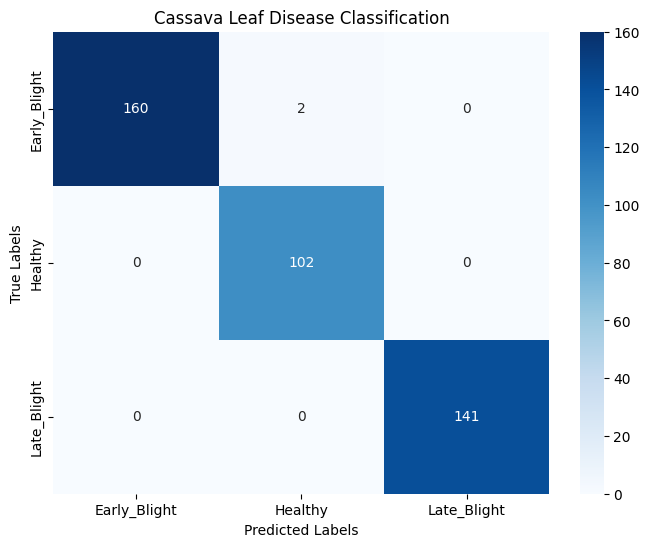

In [71]:
# Compute and display the confusion matrix
conf_matrix = confusion_matrix(test_results.label_ids, np.argmax(test_results.predictions, axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Cassava Leaf Disease Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()